# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [53]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vvns/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [55]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [56]:
# Fetch the Bitcoin news articles
blockchain_news_en = newsapi.get_everything(
    q="blockchain",
    language="en",
    sort_by="publishedAt"
)

# Show the total number of news
blockchain_news_en["totalResults"]

7239

In [65]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="publishedAt"
)

# Show the total number of news
ethereum_news_en["totalResults"]

3544

In [57]:
# Create the Bitcoin sentiment scores DataFrame
df_bitcoin = pd.DataFrame(blockchain_news_en["articles"])
df_bitcoin.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Seeking Alpha'}",Jared Simons,Marqeta: The Power Of Pay,Marqeta is a modern card issuing platform that...,https://seekingalpha.com/article/4481415-marqe...,https://static.seekingalpha.com/cdn/s3/uploads...,2022-01-29T14:30:00Z,AsiaVision/E+ via Getty Images\r\nInvestment T...
1,"{'id': None, 'name': 'CNA'}",None,"How crypto foe China Is embracing NFTs, with s...",China’s government has made clear its distaste...,https://www.channelnewsasia.com/business/how-c...,https://onecms-res.cloudinary.com/image/upload...,2022-01-29T14:13:44Z,Chinas government has made clear its distaste ...
2,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Claire Ballentine,A Rising Crypto Star Has the SEC and Volatile ...,"Ophelia Snyder, 29, is already managing $2.5 b...",https://www.bloomberg.com/news/articles/2022-0...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2022-01-29T14:10:12Z,Ophelia Snyder spent her early twenties making...
3,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Francisco Rodrigues,PayPal stablecoin: What it could mean for paym...,The impact a PayPal Coin has on the crypto ind...,https://cointelegraph.com/news/paypal-stableco...,https://images.cointelegraph.com/images/1200_a...,2022-01-29T14:01:00Z,PayPal confirmed on Jan. 8 it is exploring a s...
4,"{'id': 'ars-technica', 'name': 'Ars Technica'}",Sam Machkovech,Ubisoft execs: “Gamers are always right”—yet t...,Interview coincidentally lands on same day Ubi...,https://arstechnica.com/gaming/2022/01/ubisoft...,https://cdn.arstechnica.net/wp-content/uploads...,2022-01-29T14:00:51Z,Enlarge/ This galaxy brain image is still work...


In [66]:
# Create the Ethereum sentiment scores DataFrame
df_ethereum = pd.DataFrame(ethereum_news_en["articles"])
df_ethereum.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Claire Ballentine,A Rising Crypto Star Has the SEC and Volatile ...,"Ophelia Snyder, 29, is already managing $2.5 b...",https://www.bloomberg.com/news/articles/2022-0...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2022-01-29T14:10:12Z,Ophelia Snyder spent her early twenties making...
1,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Carla Mozée),Bitcoin's volatility won't shake the confidenc...,"Bitcoin ""doesn't seem to be scaring off the in...",https://markets.businessinsider.com/news/curre...,https://i.insider.com/617c2c711037b1001814fa61...,2022-01-29T13:15:00Z,Bitcoin and the broader cryptocurrency market'...
2,"{'id': None, 'name': 'Seeking Alpha'}",Wall Street Breakfast,Wall Street Breakfast: What Moved Markets,Listen on the go! A daily podcast of Wall Stre...,https://seekingalpha.com/article/4482738-wall-...,https://static.seekingalpha.com/assets/og_imag...,2022-01-29T13:01:02Z,Listen on the go! A daily podcast of Wall Stre...
3,"{'id': None, 'name': 'The Denver Post'}",The New York Times News Service Syndicate,Crypto enthusiasts meet their match: Angry gamers,"For more than a year, cryptomania has been at ...",https://www.denverpost.com/2022/01/29/crypto-e...,https://www.denverpost.com/wp-content/uploads/...,2022-01-29T13:00:55Z,"By Mike Isaac and Kellen Browning, The New Yor..."
4,"{'id': None, 'name': 'The Indian Express'}",Tech Desk,Hackers steal $80 million worth of crypto from...,"In a tweet, Qubit Finance acknowledged the hac...",https://indianexpress.com/article/technology/c...,https://images.indianexpress.com/2021/12/crypt...,2022-01-29T13:00:07Z,In what’s being called as the biggest cryptocu...


In [59]:
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result




In [63]:
# Describe the Bitcoin Sentiment
# Sentiment scores dictionaries
bitcoin_title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
bitcoin_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}


# Get sentiment for the text and the title
for index, row in df_bitcoin.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        bitcoin_title_sent["title_compound"].append(title_sentiment["compound"])
        bitcoin_title_sent["title_pos"].append(title_sentiment["pos"])
        bitcoin_title_sent["title_neu"].append(title_sentiment["neu"])
        bitcoin_title_sent["title_neg"].append(title_sentiment["neg"])
        bitcoin_title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["content"])
        bitcoin_text_sent["text_compound"].append(text_sentiment["compound"])
        bitcoin_text_sent["text_pos"].append(text_sentiment["pos"])
        bitcoin_text_sent["text_neu"].append(text_sentiment["neu"])
        bitcoin_text_sent["text_neg"].append(text_sentiment["neg"])
        bitcoin_text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
bitcoin_title_sentiment_df = pd.DataFrame(bitcoin_title_sent)
bitcoin_text_sentiment_df = pd.DataFrame(bitcoin_text_sent)
df_bitcoin = df_bitcoin.join(bitcoin_title_sentiment_df).join(bitcoin_text_sentiment_df)
df_bitcoin.describe()


,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.044980,0.075700,0.832100,0.092200,-0.250000,0.197410,0.075750,0.902950,0.021300,0.250000
std,0.253753,0.141965,0.211366,0.123376,0.638666,0.400386,0.071127,0.077453,0.045112,0.850696
min,-0.440400,0.000000,0.341000,0.000000,-1.000000,-0.648600,0.000000,0.727000,0.000000,-1.000000
25%,-0.152575,0.000000,0.726000,0.000000,-1.000000,-0.038275,0.000000,0.859250,0.000000,-0.250000
50%,0.000000,0.000000,0.940000,0.000000,0.000000,0.170000,0.083500,0.895500,0.000000,0.500000
75%,0.000000,0.117750,1.000000,0.206000,0.000000,0.522300,0.134750,0.958750,0.013750,1.000000
max,0.820400,0.519000,1.000000,0.330000,1.000000,0.829400,0.218000,1.000000,0.179000,1.000000


In [67]:
# Describe the Ethereum Sentiment
# Sentiment scores dictionaries
ethereum_title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
ethereum_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}


# Get sentiment for the text and the title
for index, row in df_ethereum.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        ethereum_title_sent["title_compound"].append(title_sentiment["compound"])
        ethereum_title_sent["title_pos"].append(title_sentiment["pos"])
        ethereum_title_sent["title_neu"].append(title_sentiment["neu"])
        ethereum_title_sent["title_neg"].append(title_sentiment["neg"])
        ethereum_title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["content"])
        ethereum_text_sent["text_compound"].append(text_sentiment["compound"])
        ethereum_text_sent["text_pos"].append(text_sentiment["pos"])
        ethereum_text_sent["text_neu"].append(text_sentiment["neu"])
        ethereum_text_sent["text_neg"].append(text_sentiment["neg"])
        ethereum_text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
ethereum_title_sentiment_df = pd.DataFrame(ethereum_title_sent)
ethereum_text_sentiment_df = pd.DataFrame(ethereum_text_sent)
df_ethereum = df_ethereum.join(ethereum_title_sentiment_df).join(ethereum_text_sentiment_df)

df_ethereum.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000
mean,0.006565,0.085850,0.832100,0.082000,-0.100000,0.297865,0.110100,0.854250,0.03560,0.50000
std,0.298032,0.134977,0.175588,0.121865,0.788069,0.463080,0.071556,0.072249,0.05281,0.82717
min,-0.401900,0.000000,0.467000,0.000000,-1.000000,-0.648600,0.000000,0.727000,0.00000,-1.00000
25%,-0.238025,0.000000,0.720750,0.000000,-1.000000,-0.010450,0.078250,0.782750,0.00000,0.00000
50%,0.000000,0.000000,0.858500,0.000000,0.000000,0.417600,0.096500,0.853500,0.00000,1.00000
75%,0.050575,0.135750,1.000000,0.206000,0.250000,0.672175,0.138500,0.902250,0.05700,1.00000
max,0.820400,0.519000,1.000000,0.344000,1.000000,0.859100,0.227000,1.000000,0.17900,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [68]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [149]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also','chars','char','ha'}

[nltk_data] Downloading package stopwords to /Users/vvns/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

   
    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    
    return output

In [151]:
# Create a new tokens column for Bitcoin
bitcoin_token=[tokenizer(text) for text in df_bitcoin["content"]]

df_bitcoin['tokens']=bitcoin_token

df_bitcoin.head()

,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,"{'id': None, 'name': 'Seeking Alpha'}",Jared Simons,Marqeta: The Power Of Pay,Marqeta is a modern card issuing platform that...,https://seekingalpha.com/article/4481415-marqe...,https://static.seekingalpha.com/cdn/s3/uploads...,2022-01-29T14:30:00Z,AsiaVision/E+ via Getty Images\r\nInvestment T...,-0.1027,0.0,0.741,0.259,-1,0.5994,0.140,0.860,0.000,1,"[asiavisione, via, getty, imagesinvestment, th..."
1,"{'id': None, 'name': 'CNA'}",None,"How crypto foe China Is embracing NFTs, with s...",China’s government has made clear its distaste...,https://www.channelnewsasia.com/business/how-c...,https://onecms-res.cloudinary.com/image/upload...,2022-01-29T14:13:44Z,Chinas government has made clear its distaste ...,-0.4404,0.0,0.756,0.244,-1,0.3818,0.091,0.909,0.000,1,"[chinas, government, made, clear, distaste, fr..."
2,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Claire Ballentine,A Rising Crypto Star Has the SEC and Volatile ...,"Ophelia Snyder, 29, is already managing $2.5 b...",https://www.bloomberg.com/news/articles/2022-0...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2022-01-29T14:10:12Z,Ophelia Snyder spent her early twenties making...,0.0000,0.0,1.000,0.000,0,-0.2023,0.000,0.945,0.055,-1,"[ophelia, snyder, spent, early, twenty, making..."
3,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Francisco Rodrigues,PayPal stablecoin: What it could mean for paym...,The impact a PayPal Coin has on the crypto ind...,https://cointelegraph.com/news/paypal-stableco...,https://images.cointelegraph.com/images/1200_a...,2022-01-29T14:01:00Z,PayPal confirmed on Jan. 8 it is exploring a s...,0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[paypal, confirmed, jan, exploring, stablecoin..."
4,"{'id': 'ars-technica', 'name': 'Ars Technica'}",Sam Machkovech,Ubisoft execs: “Gamers are always right”—yet t...,Interview coincidentally lands on same day Ubi...,https://arstechnica.com/gaming/2022/01/ubisoft...,https://cdn.arstechnica.net/wp-content/uploads...,2022-01-29T14:00:51Z,Enlarge/ This galaxy brain image is still work...,0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[enlarge, galaxy, brain, image, still, working..."


In [152]:
# Create a new tokens column for Ethereum

ethereum_token=[tokenizer(text) for text in df_ethereum["content"]]

df_ethereum['tokens']=ethereum_token

df_ethereum.head()


,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Claire Ballentine,A Rising Crypto Star Has the SEC and Volatile ...,"Ophelia Snyder, 29, is already managing $2.5 b...",https://www.bloomberg.com/news/articles/2022-0...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2022-01-29T14:10:12Z,Ophelia Snyder spent her early twenties making...,0.0000,0.000,1.000,0.000,0,-0.2023,0.000,0.945,0.055,-1,"[ophelia, snyder, spent, early, twenty, making..."
1,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Carla Mozée),Bitcoin's volatility won't shake the confidenc...,"Bitcoin ""doesn't seem to be scaring off the in...",https://markets.businessinsider.com/news/curre...,https://i.insider.com/617c2c711037b1001814fa61...,2022-01-29T13:15:00Z,Bitcoin and the broader cryptocurrency market'...,-0.2924,0.115,0.681,0.204,-1,0.5106,0.118,0.882,0.000,1,"[bitcoin, broader, cryptocurrency, market, wil..."
2,"{'id': None, 'name': 'Seeking Alpha'}",Wall Street Breakfast,Wall Street Breakfast: What Moved Markets,Listen on the go! A daily podcast of Wall Stre...,https://seekingalpha.com/article/4482738-wall-...,https://static.seekingalpha.com/assets/og_imag...,2022-01-29T13:01:02Z,Listen on the go! A daily podcast of Wall Stre...,0.0000,0.000,1.000,0.000,0,-0.6114,0.000,0.892,0.108,-1,"[listen, go, daily, podcast, wall, street, bre..."
3,"{'id': None, 'name': 'The Denver Post'}",The New York Times News Service Syndicate,Crypto enthusiasts meet their match: Angry gamers,"For more than a year, cryptomania has been at ...",https://www.denverpost.com/2022/01/29/crypto-e...,https://www.denverpost.com/wp-content/uploads/...,2022-01-29T13:00:55Z,"By Mike Isaac and Kellen Browning, The New Yor...",-0.2263,0.224,0.467,0.308,-1,0.3400,0.076,0.924,0.000,1,"[mike, isaac, kellen, browning, new, york, tim..."
4,"{'id': None, 'name': 'The Indian Express'}",Tech Desk,Hackers steal $80 million worth of crypto from...,"In a tweet, Qubit Finance acknowledged the hac...",https://indianexpress.com/article/technology/c...,https://images.indianexpress.com/2021/12/crypt...,2022-01-29T13:00:07Z,In what’s being called as the biggest cryptocu...,-0.3182,0.126,0.662,0.212,-1,-0.6486,0.094,0.727,0.179,-1,"[whats, called, biggest, cryptocurrency, heist..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [153]:
from collections import Counter
from nltk import ngrams

In [154]:
# Generate the Bitcoin N-grams where N=2
bitcoin_processed=[]
for tokens in df_bitcoin['tokens']:
    for token in tokens:
        bitcoin_processed.append(token)
bigram_counts_bitcoin = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bigram_counts_bitcoin))

{('asiavisione', 'via'): 1, ('via', 'getty'): 1, ('getty', 'imagesinvestment'): 1, ('imagesinvestment', 'thesis'): 1, ('thesis', 'recent'): 1, ('recent', 'affirm'): 1, ('affirm', 'afrm'): 1, ('afrm', 'note'): 1, ('note', 'explored'): 1, ('explored', 'affirm'): 1, ('affirm', 'reorienting'): 1, ('reorienting', 'consumer'): 1, ('consumer', 'credit'): 1, ('credit', 'ecosystem'): 1, ('ecosystem', 'twosided'): 1, ('twosided', 'solution'): 1, ('solution', 'affirm'): 1, ('affirm', 'u'): 1, ('u', 'chinas'): 1, ('chinas', 'government'): 1, ('government', 'made'): 1, ('made', 'clear'): 1, ('clear', 'distaste'): 1, ('distaste', 'freewheeling'): 1, ('freewheeling', 'antiestablishment'): 1, ('antiestablishment', 'cryptocurrency'): 1, ('cryptocurrency', 'community'): 1, ('community', 'come'): 1, ('come', 'cryptos'): 1, ('cryptos', 'blockchain'): 1, ('blockchain', 'technology'): 1, ('technology', 'however'): 1, ('however', 'different'): 1, ('different', 'storypres'): 1, ('storypres', 'ophelia'): 1, ('

In [155]:
# Generate the Ethereum N-grams where N=2
processed=[]
for tokens in df_ethereum['tokens']:
    for token in tokens:
        processed.append(token)
bigram_counts_ethereum = Counter(ngrams(processed, n=2))
print(dict(bigram_counts_ethereum))

{('ophelia', 'snyder'): 1, ('snyder', 'spent'): 1, ('spent', 'early'): 1, ('early', 'twenty'): 1, ('twenty', 'making'): 1, ('making', 'marine'): 1, ('marine', 'biology'): 1, ('biology', 'documentary'): 1, ('documentary', 'discovery'): 1, ('discovery', 'channel'): 1, ('channel', 'shes'): 1, ('shes', 'managing'): 1, ('managing', 'billion'): 1, ('billion', 'risky'): 1, ('risky', 'volatile'): 1, ('volatile', 'corner'): 1, ('corner', 'financesnyders'): 1, ('financesnyders', 'firm'): 1, ('firm', 'bitcoin'): 1, ('bitcoin', 'broader'): 1, ('broader', 'cryptocurrency'): 1, ('cryptocurrency', 'market'): 1, ('market', 'wild'): 1, ('wild', 'ride'): 1, ('ride', 'start'): 1, ('start', 'unlikely'): 1, ('unlikely', 'deter'): 1, ('deter', 'institutional'): 1, ('institutional', 'investor'): 1, ('investor', 'trying'): 1, ('trying', 'capture'): 1, ('capture', 'piece'): 1, ('piece', 'overall'): 1, ('overall', 'growth'): 1, ('growth', 'digital'): 1, ('digital', 'asset'): 1, ('asset', 'acc'): 1, ('acc', 'lis

In [156]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [157]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(token_count(bigram_counts_bitcoin,10)))

{('legal', 'tender'): 2, ('wild', 'ride'): 2, ('video', 'game'): 2, ('following', 'series'): 2, ('series', 'recordbreaking'): 2, ('recordbreaking', 'idos'): 2, ('idos', 'recent'): 2, ('recent', 'listing'): 2, ('listing', 'two'): 2, ('two', 'world'): 2}


In [158]:
# Use token_count to get the top 10 words for Ethereum
print(dict(token_count(bigram_counts_ethereum,10)))

{('new', 'york'): 2, ('video', 'game'): 2, ('crypto', 'asset'): 2, ('ophelia', 'snyder'): 1, ('snyder', 'spent'): 1, ('spent', 'early'): 1, ('early', 'twenty'): 1, ('twenty', 'making'): 1, ('making', 'marine'): 1, ('marine', 'biology'): 1}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [160]:
# Generate the Bitcoin word cloud
words_bitcoin=Counter(bitcoin_processed)
bitcoin_words_df=pd.DataFrame.from_dict(words_bitcoin, orient="index")

In [161]:
bitcoin_words_df.sort_values(by=[0],ascending=False,inplace=True)

In [162]:
bitcoin_list=str(bitcoin_words_df.index.tolist())

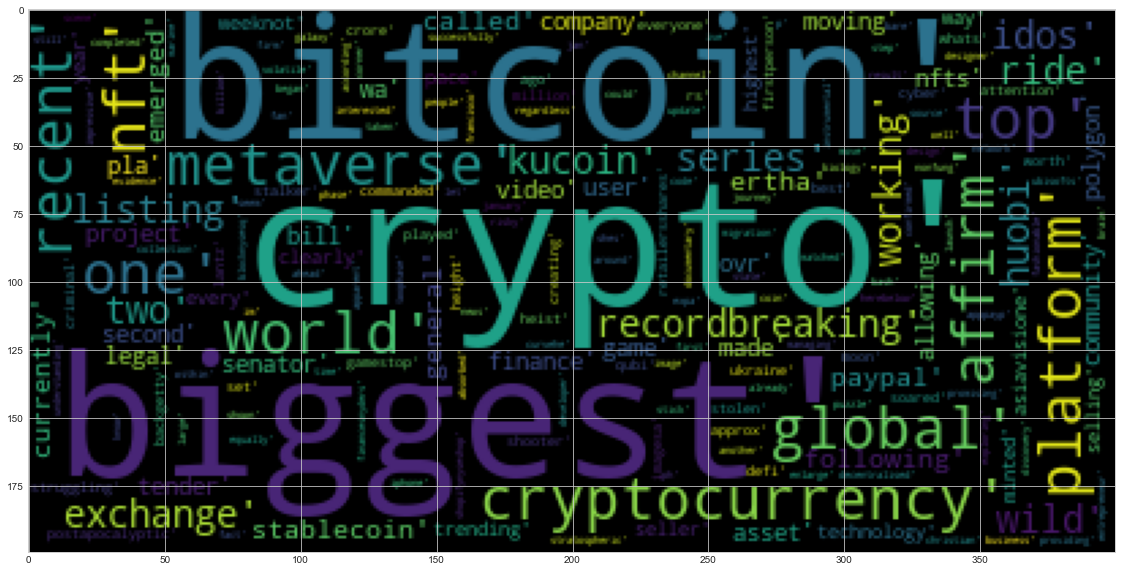

In [163]:
wc=WordCloud().generate(bitcoin_list)
plt.imshow(wc)

In [164]:
# Generate the Ethereum word cloud
words_ethereum=Counter(processed)
ethereum_words_df=pd.DataFrame.from_dict(words_ethereum, orient="index")

In [165]:
ethereum_words_df.sort_values(by=[0],ascending=False,inplace=True)
ethereum_list=str(ethereum_words_df.index.tolist())

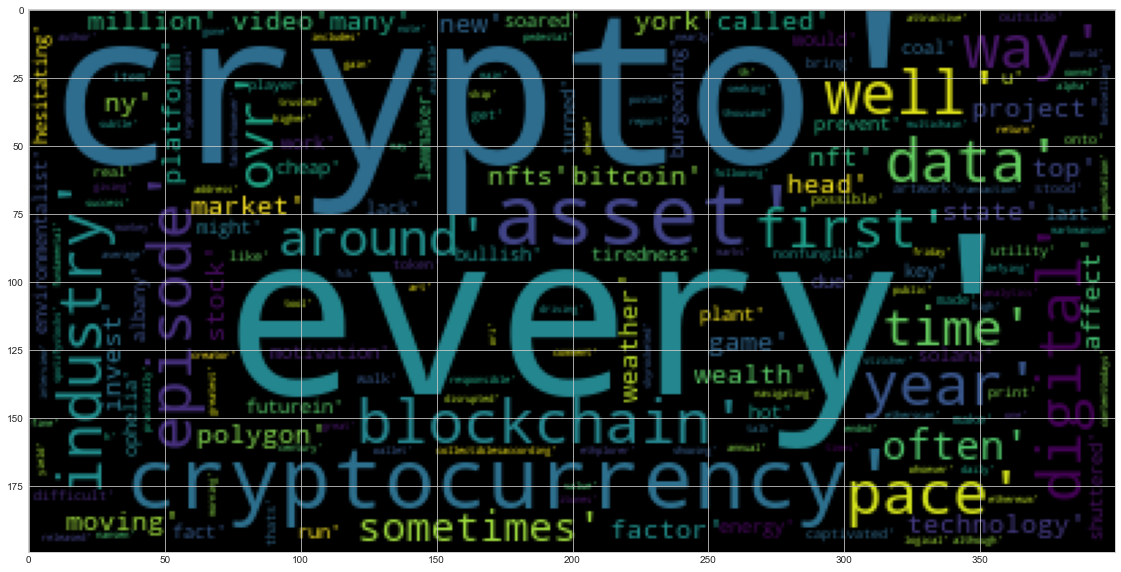

In [166]:
wc_ethereum=WordCloud().generate(ethereum_list)
plt.imshow(wc_ethereum)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [167]:
import spacy
from spacy import displacy

In [168]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm


✘ Server error (503)
Couldn't fetch compatibility table. Please find a package for your spaCy
installation (v3.0.7), and download it manually. For more details, see the
documentation: https://spacy.io/usage/models



In [169]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [171]:
# Concatenate all of the Bitcoin text together
bitcoin_text=''
for i in df_bitcoin['content']:
    bitcoin_text += i

In [172]:
# Run the NER processor on all of the text
edoc=nlp(bitcoin_text)

# Add a title to the document
edoc.user_data["title"]="Bitcoin NER"

In [174]:
# Render the visualization
displacy.render(edoc,style='ent')

In [176]:
# List all Entities
entities = [ent.text for ent in edoc.ents]
entities

['Getty Images\r\nInvestment Thesis',
 'Affirm',
 'Affirm',
 'two',
 'Pres',
 'Snyder',
 'early twenties',
 'the Discovery Channel',
 '29',
 '$2.5\xa0billion',
 'Jan. 8',
 'PayPal Coin',
 'iPhone',
 'Ubisoft',
 'NFT',
 '26',
 '19',
 'the weeks',
 'Ubisoft',
 'Wonderland',
 'Twitter',
 'Wendy Rogers',
 'Arizona',
 'this week',
 '1341',
 'the start of 2022',
 'second',
 'Bitcoin',
 'the end of January',
 'KEGOC',
 'Mike Isaac',
 'Kellen Browning',
 'The New York Times',
 'SAN FRANCISCO',
 'years',
 'Christian Lantz',
 'first',
 'Ukraine',
 'Getty Images',
 'A year ago',
 'GameStop',
 '2022',
 '$80 million',
 '600',
 'DeFi',
 'Qubi',
 'this week',
 'NFT',
 '10',
 'NFT',
 'NonFung',
 'two',
 'Huobi Global',
 'Ertha Metaverse',
 'one',
 'two',
 'Huobi Global',
 'Ertha Metaverse',
 'one',
 'OVR',
 'first',
 'two',
 'the Polygon Network',
 'January',
 'second',
 'OVR',
 'Polygon']

---

### Ethereum NER

In [177]:
# Concatenate all of the Ethereum text together
ethereum_text=''
for i in df_ethereum['content']:
    ethereum_text += i

In [178]:
# Run the NER processor on all of the text
edoc_eth=nlp(ethereum_text)

# Add a title to the document
edoc_eth.user_data["title"]="Ethereum NER"

In [179]:
# Render the visualization
displacy.render(edoc_eth,style='ent')

In [180]:
# List all Entities
entities = [ent.text for ent in edoc_eth.ents]
entities

['early twenties',
 'the Discovery Channel',
 '29',
 '$2.5\xa0billion',
 'the start of 2022',
 'daily',
 'Wall Street Breakfast',
 'every morning',
 'Seeking Alpha',
 'iTunes',
 'Stitcher',
 'Spotify',
 'Stocks',
 'Friday',
 'Mike Isaac',
 'Kellen Browning',
 'The New York Times',
 'SAN FRANCISCO',
 'years',
 'Christian Lantz',
 'first',
 'Ukraine',
 '2022',
 '$80 million',
 '600',
 'DeFi',
 'Qubi',
 'this week',
 'NFT',
 '10',
 'NFT',
 'NonFung',
 'first',
 'two',
 'the Polygon Network',
 'January',
 'second',
 'OVR',
 'Polygon',
 'Shutterstock.com',
 'Gorillaz',
 'Shiba',
 '2021',
 'nearly 42,000,000%',
 '2.50',
 'N.Y',
 'New York',
 'Bitcoin',
 'Solana',
 'more than 11,000%',
 'last year',
 'thousands',
 'well over a century',
 'one',
 'every year',
 'annual',
 'more than a decade',
 '#1 NY Times Bestselling',
 'The Subtle Art of Not Giving',
 'Marks',
 '2021',
 'the Crypto Industry Report’',
 'Ethereum',
 'Ethplorer']

---